<a href="https://colab.research.google.com/github/astidwis7/news_topic_classification/blob/main/pyNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Python program to classify News Topic using Machine Learning***

Link to open the dataset --> [news](https://drive.google.com/drive/folders/1vMWTDdWQGXqtViSxKEZVR8vgIRFe--0Y?usp=sharing)

In [ ]:
# retrieve news data

import glob
import json

!unzip !unzip /content/news.zip

path = glob.glob("/content/Indonesian news corpus/json/*.json")

content = []
category = []
for _ in path:
  f = open(_)
  data = json.load(f)
  for i in data:
    content.append(i['isi'])
  for i in data:
    category.append(i['kategori'])
  f.close()

In [3]:
# news text cleaning & labeling

import pandas as pd
import re

category_ = list(pd.unique(pd.Series(category)))

news = []
label = []
for count, _ in enumerate(category_):
  for i in range(len(content)):
    if category[i] == _:
      if len(news) < (count+1)*1250:
        content[i]=content[i].lower()
        content[i]=re.sub('[^ A-Za-z]','',content[i])
        news.append(' '.join(content[i].split()[3:]))
        label.append(count)

Link to open the vocab data --> [vocab](https://drive.google.com/file/d/103hrEbKWygdx7D-6F_cbna1nx0Oz5AvU/view?usp=sharing)

In [5]:
# generate word vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

word = pd.read_fwf('/content/vocab.txt')

tfidfvectorizer = TfidfVectorizer(use_idf=True)
tfidfvectorizer.fit(word['Laskar Pelangi'])

vocab = tfidfvectorizer.get_feature_names_out()
vocab = np.array(vocab)

In [6]:
# accommodate foreign words in the news

new_word = []
for _ in news:
  sentence_ = np.asarray(_.split(' '))
  new_word_ = sentence_[np.array([word not in vocab for word in sentence_]) == True]
  new_word.append(new_word_)

In [7]:
# takes the top 50 words in the news

news_ = []
this_much = 50
for count, _ in enumerate(news):
  word_ = tfidfvectorizer.transform([_]).todense()
  significant_word = np.argsort(np.asarray(word_.sum(axis=0)).ravel())[::-1]
  top_word = vocab[significant_word[:this_much]]
  new_word_dan_top_word = np.concatenate((new_word[count], top_word))[:this_much]
  news_.append(" ".join(new_word_dan_top_word))

In [8]:
# retrieves the text and label of each news item

data_ = pd.DataFrame(pd.DataFrame([np.asarray(news_), np.asarray(label)]).values.T)

x = data_.iloc[:,0].values
y = data_.iloc[:,1].values

In [9]:
# randomize data

import random
import numpy as np

x_ = []
for _ in x:
  x_.append(_)
y_ = []
for _ in y:
  y_.append(_)

b = list(zip(x_, y_))
random.shuffle(b)
x_, y_ = zip(*b)
x_ = list(x_)
y_ = list(y_)

In [ ]:
# vectorization with TF-IDF on the news data

from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfvectorizer_ = TfidfVectorizer(use_idf=True, max_features=100)
tfidfvectorizer_.fit(x_)

x_t = tfidfvectorizer_.transform(x_).toarray()

tfidfvectorizer_.get_feature_names_out()

In [13]:
# classification using machine learning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

neigh = KNeighborsClassifier(n_neighbors=7)
clf = GaussianNB()
ran = RandomForestClassifier(max_depth=2, random_state=0)
cls = svm.SVC()
mlp = MLPClassifier(random_state=1, max_iter=300)
ridge = RidgeClassifier(alpha=1.0)
sgd = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))

neigh.fit(x_t, y_)
clf.fit(x_t, y_)
ran.fit(x_t, y_)
cls.fit(x_t, y_)
mlp.fit(x_t, y_)
ridge.fit(x_t, y_)
sgd.fit(x_t, y_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [24]:
# displays the score of each classification algorithm

print(neigh.score(x_t, y_))
print(clf.score(x_t, y_))
print(ran.score(x_t, y_))
print(cls.score(x_t, y_))
print(mlp.score(x_t, y_))
print(ridge.score(x_t, y_))
print(sgd.score(x_t, y_))

0.6575
0.4989
0.5541
0.7065
0.7372
0.6283
0.5964


In [26]:
# predict using MLP

mlp_pred = mlp.predict(x_t)

<Axes: >

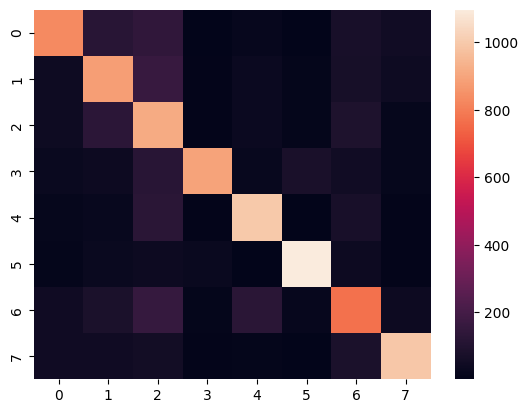

In [36]:
# classification visualization using MLP

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_, mlp_pred)
sns.heatmap(cm)

In [37]:
# classification report via MLP

from sklearn.metrics import classification_report

print (classification_report(y_, mlp_pred))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1250
           1       0.65      0.70      0.68      1250
           2       0.53      0.73      0.62      1250
           3       0.91      0.72      0.80      1250
           4       0.80      0.80      0.80      1250
           5       0.89      0.88      0.88      1250
           6       0.62      0.62      0.62      1250
           7       0.85      0.80      0.82      1250

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000

